In [9]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import cm
from numpy import random
from scipy import stats

In [2]:
help(kde)

NameError: name 'kde' is not defined

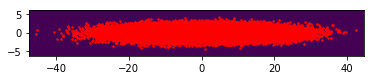

In [56]:
import matplotlib.pyplot as plt

def Get_series(n):
    m1 = np.random.normal(size=n)*10
    m2 = np.random.normal(size=n)
    return m1, m2

def Get_DensityMap(m1,m2, patch=2):
    ymax = m2.max()+patch
    xmin = m1.min()-patch
    xmax = m1.max()+patch
    ymin = m2.min()-patch
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.flatten(), Y.flatten()])
    values = np.vstack([m1, m2])
    kernel = stats.kde.gaussian_kde(values,0.2)
    return np.rot90(np.reshape(kernel(positions).T, X.shape)), [xmin, xmax, ymin, ymax]

m1, m2 = Get_series(100000)
Z , ext = Get_DensityMap(m1,m2)

fig, ax = plt.subplots()
ax.imshow(Z,extent=ext)
ax.plot(m1, m2, 'r.', markersize=3)
ax.set_xlim([ext[0], ext[1]])
ax.set_ylim([ext[2], ext[3]])
ax.set_aspect('equal')
plt.show()

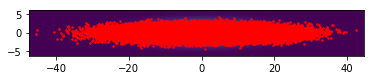

In [57]:
import statsmodels.api as sm
patch=2
ymax = m2.max()+patch
xmin = m1.min()-patch
xmax = m1.max()+patch
ymin = m2.min()-patch
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

ext = [xmin, xmax, ymin, ymax]

import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate([m1, m2], var_type='cc', bw='normal_reference')
kde = sm.nonparametric.KDEMultivariate([m1, m2], var_type='cc', bw=np.tile((kde.bw[0]),2))
fig, ax = plt.subplots()
ax.imshow(np.rot90(np.reshape(kde.pdf([X.flatten(), Y.flatten()]).T, X.shape)),extent=ext)
ax.plot(m1, m2, 'r.', markersize=3)
ax.set_xlim([ext[0], ext[1]])
ax.set_ylim([ext[2], ext[3]])
ax.set_aspect('equal')

array([ 5.46405076,  5.46405076])

In [40]:
help(sm.nonparametric.KDEMultivariate)

Help on class KDEMultivariate in module statsmodels.nonparametric.kernel_density:

class KDEMultivariate(statsmodels.nonparametric._kernel_base.GenericKDE)
 |  Multivariate kernel density estimator.
 |  
 |  This density estimator can handle univariate as well as multivariate data,
 |  including mixed continuous / ordered discrete / unordered discrete data.
 |  It also provides cross-validated bandwidth selection methods (least
 |  squares, maximum likelihood).
 |  
 |  Parameters
 |  ----------
 |  data: list of ndarrays or 2-D ndarray
 |      The training data for the Kernel Density Estimation, used to determine
 |      the bandwidth(s).  If a 2-D array, should be of shape
 |      (num_observations, num_variables).  If a list, each list element is a
 |      separate observation.
 |  var_type: str
 |      The type of the variables:
 |  
 |          - c : continuous
 |          - u : unordered (discrete)
 |          - o : ordered (discrete)
 |  
 |      The string should contain a type

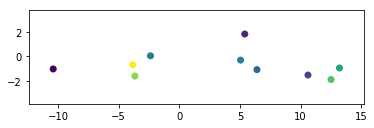

In [39]:
import statsmodels.api as sm
patch=2
ymax = m2.max()+patch
xmin = m1.min()-patch
xmax = m1.max()+patch
ymin = m2.min()-patch
X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

ext = [xmin, xmax, ymin, ymax]

import statsmodels.api as sm
kde = sm.nonparametric.KDEMultivariate([m1, m2], var_type='cc', bw=np.array([1,  1]))
fig, ax = plt.subplots()

cc = kde.pdf([m1, m2])


ax.scatter(m1, m2, c=cc)
ax.set_xlim([ext[0], ext[1]])
ax.set_ylim([ext[2], ext[3]])
ax.set_aspect('equal')

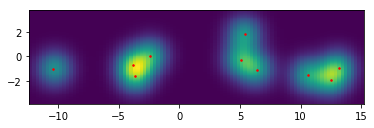

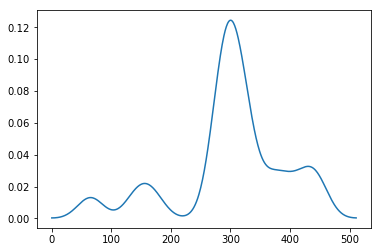

In [284]:
def ScatterDensity(ax, xx, yy, Bandw, Map=True,ScatterOptions ={},MapOptions = {}):
    '''Should perform a density computation for scatter plot color or density map plot
    but gaussian_kde seems to provide wrong elongated gaussian'''
    from scipy.stats import gaussian_kde
    from matplotlib import cm

    
    if Map: #if map case
        ext,x_mesh,y_mesh,intensity = Quad_densityMap(xx,yy,h=1, grid_size=0.1)
        if ScatterOptions== None:
            ScatterOptions = {'facecolors':(0,0,1), 's':8, 'edgecolor':(0,0,0), 'linewidth':0.2}
            
        if MapOptions ==  None:
            MapOptions = {'cmap':'Oranges'}
            
        if np.sum([k=='cmap' for k in MapOptions.keys()])==0:
            MapOptions['cmap']='Oranges'
        #MapOptions['extent'] = ext
        im = ax.pcolormesh(x_mesh,y_mesh,intensity, vmax=np.mean(intensity), **MapOptions)# cmap='Oranges', extent=[xmin, xmax, ymin, ymax])
        im = ax.scatter(xx,yy,zorder=2,**ScatterOptions) # facecolors=(0,0,1), s=Si, edgecolor=Edgecolor, linewidth=Linewidth)
        #print(Z.max())
        #print(Z.min())
        #print(np.mean(Z))
        #print(np.median(Z))
        
    else: #if simple scatter case
        
        kde = gaussian_kde(np.vstack([xx,yy]),Bandw)
        zz = kde(np.vstack([xx,yy]))
        if ScatterOptions== None:
            ScatterOptions = {'cmap':'jet', 's':8, 'edgecolor':None}
        if np.sum([k=='s' for k in ScatterOptions.keys()])==0:
            ScatterOptions['s'] = 8
        if np.sum([k=='cmap' for k in ScatterOptions.keys()])==0:
            ScatterOptions['cmap'] = 'jet'
            
        cc = cm.get_cmap(ScatterOptions['cmap'])((zz-zz.min())/(zz.max()-zz.min()))
        ScatterOptions['facecolors'] = cc
        im = ax.scatter(xx,yy,zorder=2, **ScatterOptions) #facecolors=cc, s=Si, edgecolor=Edgecolor, linewidth=Linewidth)
        
    return im


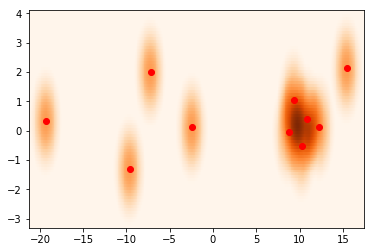

In [219]:
import matplotlib.pyplot as plt
import numpy as np
import math
#POINT DATASET
x=m1
y=m2

#DEFINE GRID SIZE AND RADIUS(h)
grid_size=0.1
h=2
def Quad_densityMap(x,y,h=0.5, grid_size=1):
    import math

    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    #FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    return x_mesh,y_mesh,intensity
x_mesh,y_mesh,intensity = Quad_densityMap(x,y,h=2, grid_size=0.1)
plt.pcolormesh(x_mesh,y_mesh,intensity,cmap='Oranges')
plt.plot(x,y,'ro')
plt.axis()
plt.show()

In [202]:
x_mesh.shape

(24, 55)

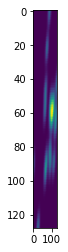

In [170]:
import numpy as np
import scipy.stats as stats
from matplotlib import pyplot as plt

# Create some dummy data
rvs = np.append(np.random.normal(size=(20,1))*5,
                np.random.normal(size=(20,1)),
                axis=1)

kde = stats.kde.gaussian_kde(rvs.T,0.2)

# Regular grid to evaluate kde upon
x_flat = np.r_[rvs[:,0].min():rvs[:,0].max():128j]
y_flat = np.r_[rvs[:,1].min():rvs[:,1].max():128j]
x,y = np.meshgrid(x_flat,y_flat)
grid_coords = np.append(x.reshape(-1,1),y.reshape(-1,1),axis=1)

z = kde(grid_coords.T)
z = z.reshape(128,128)

plt.imshow(z,aspect=x_flat.ptp()/y_flat.ptp())
plt.show()

In [58]:
n = 600
xx = np.random.randn(n)
yy = (1 * xx) + np.random.randn(n)
kde = stats.gaussian_kde(np.vstack([xx,yy]))
zz = kde(np.vstack([xx,yy]))
zz.min(),zz.max()

(0.0023862402437036597, 0.14743270161822961)

In [63]:
np.vstack([xx,yy]).shape

(2, 600)

In [60]:
cc = cm.get_cmap('jet')((zz-zz.min())/(zz.max()-zz.min()))
cc.min(),cc.max()

(0.0, 1.0)

In [61]:
np.mgrid[xmin:xmax:500j].shape

(500,)

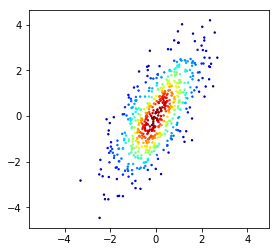

In [62]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.subplot(1,1,1)
ax.scatter(xx,yy,facecolors=cc, s=2)
ax.set_aspect('equal','datalim')
plt.savefig('scatter_gaussian_kde.png', bbox_inches='tight', pad_inches=0.02, dpi=200)



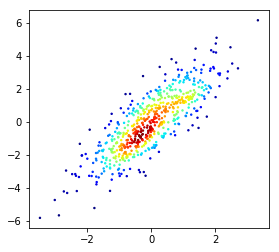

In [8]:
fig = plt.figure(figsize=(4.3,4))
ax = plt.subplot(1,1,1)
def ScatterDensity(ax, xx, yy, CmapName='jet', Si=2, edgecolor=None):
    from scipy.stats import gaussian_kde
    kde = stats.gaussian_kde([xx,yy])
    zz = kde([xx,yy])
    zz.min(),zz.max()
    cc = cm.get_cmap(CmapName)((zz-zz.min())/(zz.max()-zz.min()))
    ax.scatter(xx,yy,facecolors=cc, s=Si, edgecolor=None)
ScatterDensity(ax, xx, yy, CmapName='jet', Si=2, edgecolor=None)

In [351]:
y = np.random.randint(0,100,(30,))
Indexs = GetIndex(y, )

In [359]:
np.sum([len(ind[0]) for ind in Indexs])

30

In [366]:
[8 for s in range(len([8,50,88])+1)]

[8, 8, 8, 8]

In [346]:
def GetIndex(y, Thresholds):
    sub_s = -np.inf
    Indexs = []
    Thresholds.append(np.inf)
    for s in Thresholds:
        Indexs.append(np.where(np.logical_and(y<=s, y>sub_s)))
        sub_s = s
    assert np.sum([len(ind[0]) for ind in Indexs])==len(y)
    return Indexs

class my_2IterationsModel():
    '''Allows to fit and predicts model with to different steps.'''
    def __init__(self, Model, Thresholds, ModelsArguments={}):
        Thresholds.append(np.inf)
        self.Thres = Thresholds
        self.Models_ = [Model(**ModelsArguments) for s in range(1+len(self.Thres))]
        self.GlobModel = Model(**ModelsArguments)
        self.y_First = np.float()
        
    def __repr__(self):
        return "2Iters"+str(self.GlobModel)

        
    def fit(self,x, y):
        self.GlobModel.fit(x,y)

        Indexs = GetIndex(y, self.Thres)   
        for i, ind in enumerate(Indexs):
            if len(x[ind])!=0:
                self.Models_[i].fit(x[ind], y[ind])
                
        self.coef_ = [m.coef_ for m in self.Models_]
        self.intercept_ = [m.intercept_ for m in self.Models_]
            
    def predict(self, x):
        self.y_First = self.GlobModel.predict(x)
        predicted = np.full(self.y_First.shape, np.nan)
        Indexs = GetIndex(self.y_First, self.Thres)  
        
        for i, ind in enumerate(Indexs):
            if len(x[ind])!=0:
                predicted[ind] = self.Models_[i].predict(x[ind])
        return predicted

In [ ]:
def Get_DensityMap(m1,m2, patch=2, bandW='scott'):
    from scipy.stats import gaussian_kde
    
    ymax = m2.max()+patch
    xmin = m1.min()-patch
    xmax = m1.max()+patch
    ymin = m2.min()-patch
    X, Y = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = gaussian_kde(values, bandW)
    print(kernel.covariance)
    return np.rot90(np.reshape(kernel(positions).T, X.shape)), [xmin, xmax, ymin, ymax]

def ScatterDensity(ax, xx, yy, Bandw, Map=True,ScatterOptions ={},MapOptions = {}):
    '''Should perform a density computation for scatter plot color or density map plot
    but gaussian_kde seems to provide wrong elongated gaussian'''
    from scipy.stats import gaussian_kde
    from matplotlib import cm

    
    if Map: #if map case
        ext,x_mesh,y_mesh,intensity = Quad_densityMap(xx,yy,h=1, grid_size=0.1)
        if ScatterOptions== None:
            ScatterOptions = {'facecolors':(0,0,1), 's':8, 'edgecolor':(0,0,0), 'linewidth':0.2}
            
        if MapOptions ==  None:
            MapOptions = {'cmap':'Oranges'}
            
        if np.sum([k=='cmap' for k in MapOptions.keys()])==0:
            MapOptions['cmap']='Oranges'
        #MapOptions['extent'] = ext
        im = ax.pcolormesh(x_mesh,y_mesh,intensity, vmax=np.mean(intensity), **MapOptions)# cmap='Oranges', extent=[xmin, xmax, ymin, ymax])
        im = ax.scatter(xx,yy,zorder=2,**ScatterOptions) # facecolors=(0,0,1), s=Si, edgecolor=Edgecolor, linewidth=Linewidth)
        #print(Z.max())
        #print(Z.min())
        #print(np.mean(Z))
        #print(np.median(Z))
        
    else: #if simple scatter case
        
        kde = gaussian_kde(np.vstack([xx,yy]),Bandw)
        zz = kde(np.vstack([xx,yy]))
        if ScatterOptions== None:
            ScatterOptions = {'cmap':'jet', 's':8, 'edgecolor':None}
        if np.sum([k=='s' for k in ScatterOptions.keys()])==0:
            ScatterOptions['s'] = 8
        if np.sum([k=='cmap' for k in ScatterOptions.keys()])==0:
            ScatterOptions['cmap'] = 'jet'
            
        cc = cm.get_cmap(ScatterOptions['cmap'])((zz-zz.min())/(zz.max()-zz.min()))
        ScatterOptions['facecolors'] = cc
        im = ax.scatter(xx,yy,zorder=2, **ScatterOptions) #facecolors=cc, s=Si, edgecolor=Edgecolor, linewidth=Linewidth)
        
    return im

In [ ]:
def Quad_densityMap(x,y,h=0.5, grid_size=1):
    '''Perform a computaion of density map.
    Thank you the web'''
    import math

    #GETTING X,Y MIN AND MAX
    x_min=min(x)
    x_max=max(x)
    y_min=min(y)
    y_max=max(y)

    #CONSTRUCT GRID
    x_grid=np.arange(x_min-h,x_max+h,grid_size)
    y_grid=np.arange(y_min-h,y_max+h,grid_size)
    x_mesh,y_mesh=np.meshgrid(x_grid,y_grid)

    #GRID CENTER POINT
    xc=x_mesh+(grid_size/2)
    yc=y_mesh+(grid_size/2)

    #FUNCTION TO CALCULATE INTENSITY WITH QUARTIC KERNEL
    def kde_quartic(d,h):
        dn=d/h
        P=(15/16)*(1-dn**2)**2
        return P

    #PROCESSING
    intensity_list=[]
    for j in range(len(xc)):
        intensity_row=[]
        for k in range(len(xc[0])):
            kde_value_list=[]
            for i in range(len(x)):
                #CALCULATE DISTANCE
                d=math.sqrt((xc[j][k]-x[i])**2+(yc[j][k]-y[i])**2) 
                if d<=h:
                    p=kde_quartic(d,h)
                else:
                    p=0
                kde_value_list.append(p)
            #SUM ALL INTENSITY VALUE
            p_total=sum(kde_value_list)
            intensity_row.append(p_total)
        intensity_list.append(intensity_row)

    #HEATMAP OUTPUT    
    intensity=np.array(intensity_list)
    return [x_min, x_max, y_min, y_max], x_mesh,y_mesh,intensity